## Imports

In [3]:
import pandas as pd
from streamz import Stream
from streamz.dataframe import DataFrame
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt
import toolz
import random
from datetime import datetime
from scipy.spatial import distance
from  matplotlib.colors import LinearSegmentedColormap
import dask.dataframe as dd

In [4]:
dfheadinfo = pd.read_parquet('./data/2022.gz.parquet')

## Number of tickets by closest school

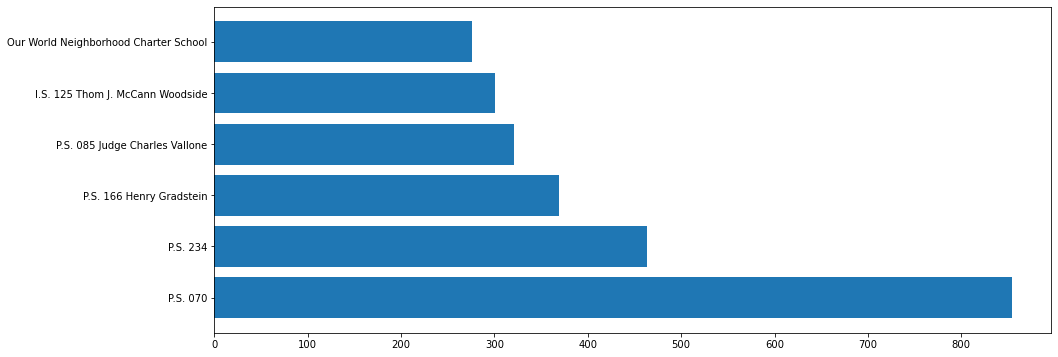

./data/2022.gz.parquet
20000/1289612


KeyboardInterrupt: 

In [3]:

plt.rcParams["figure.figsize"] = (15,6)

source = Stream()

sources = ['./data/{0}.gz.parquet'.format(x) for x in range(2015,2023)]


sdf = DataFrame(stream = source, example= dfheadinfo.head(1))

d = {}

def stest(r):
    s_name = str(r['Closest_school_name'])
    if s_name in d:
        d[s_name] = d[s_name] + 1
    else:
        d[s_name] = 1
    

sdf.stream.sink(stest)

for j in sources:
    df = pd.read_parquet(j)
    for i in range(len(df)):
        source.emit(df.iloc[i])
        if i%1000==0:
            clear_output(wait=True)
            plt.clf()
            tmp = d.copy()
            #tmp.pop('Unknown', None)
            data = dict(sorted(tmp.items(), key=lambda item: item[1], reverse=True)[:6])
            plt.barh(range(len(data)), list(data.values()), tick_label=list(data.keys()))
            plt.show()
            print("{2}\n{0}/{1}".format(i, len(df), j))


## Average price of tickets by closest school

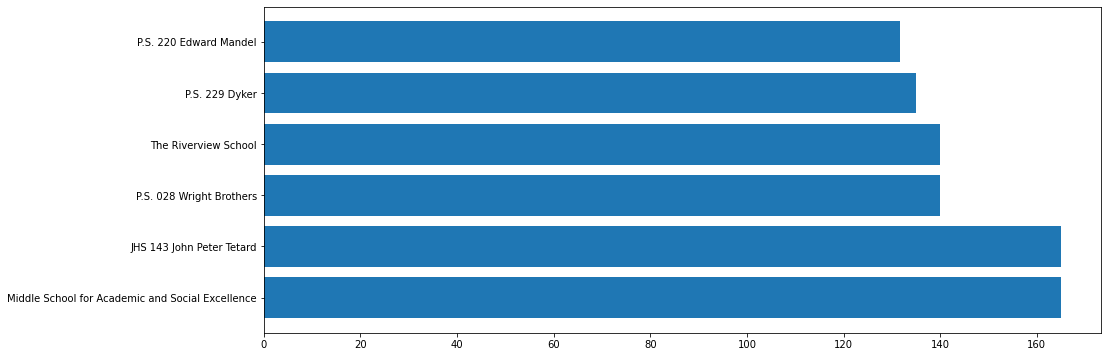

./data/2022.gz.parquet
2000/1289612


KeyboardInterrupt: 

In [6]:

plt.rcParams["figure.figsize"] = (15,6)

source = Stream()

sources = ['./data/{0}.gz.parquet'.format(x) for x in range(2015,2023)]


sdf = DataFrame(stream = source, example= dfheadinfo.head(1))

avg = {}
count = {}

def stest(r):
    s_name = str(r['Closest_school_name'])
    if s_name in avg:
        avg[s_name] += (r['Violation Price']-avg[s_name])/count[s_name]
        count[s_name] += 1
    else:
        avg[s_name] = r['Violation Price']
        count[s_name] = 2
    

sdf.stream.sink(stest)

for j in sources:
    df = pd.read_parquet(j)
    for i in range(len(df)):
        source.emit(df.iloc[i])
        if i%1000==0:
            clear_output(wait=True)
            plt.clf()
            tmp = avg.copy()
            #tmp.pop('Unknown', None)
            data = dict(sorted(tmp.items(), key=lambda item: item[1], reverse=True)[:6])
            plt.barh(range(len(data)), list(data.values()), tick_label=list(data.keys()))
            plt.show()
            print("{2}\n{0}/{1}".format(i, len(df), j))
        

## Number of tickets by car color

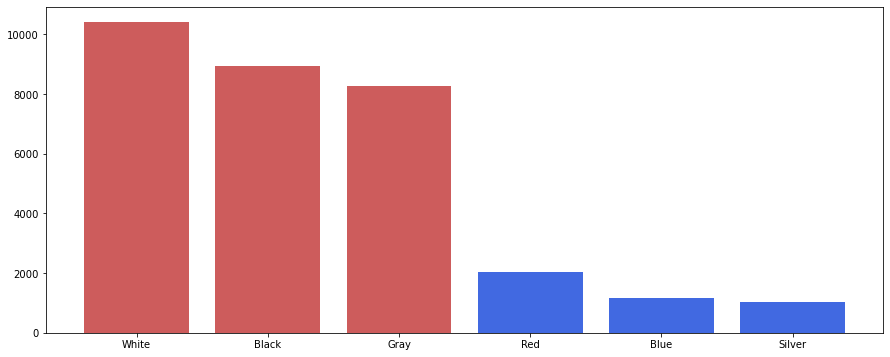

./data/2022.gz.parquet
38000/1289612


KeyboardInterrupt: 

In [8]:

plt.rcParams["figure.figsize"] = (15,6)

source = Stream()

sources = ['./data/{0}.gz.parquet'.format(x) for x in range(2015,2023)]


sdf = DataFrame(stream = source, example= dfheadinfo.head(1))

d = {'Gray' : 0, 'White' : 0, 'Unknown' : 0, 'Green' : 0, 'Red' : 0, 'Blue' : 0, 'Black' : 0, 
     'Pink' : 0, 'Silver' : 0, 'Gold' : 0, 'Brown' : 0, 'Yellow' : 0, 'Purple' : 0, 'Orange' : 0}

def stest(r):
    d[str(r['Vehicle Color'])] = d[str(r['Vehicle Color'])] + 1

    

sdf.stream.sink(stest)

for j in sources:
    df = pd.read_parquet(j)
    for i in range(len(df)):
        source.emit(df.iloc[i])
        if i%1000==0:
            clear_output(wait=True)
            plt.clf()
            tmp = d.copy()
            tmp.pop('Unknown', None)
            data = dict(sorted(tmp.items(), key=lambda item: item[1], reverse=True)[:6])
            plt.bar(range(len(data)), list(data.values()), tick_label=list(data.keys()),
                   color=['indianred']*3+['royalblue']*3)
            plt.show()
            print("{2}\n{0}/{1}".format(i, len(df), j))
        

## Average ticket price for cars of a given color

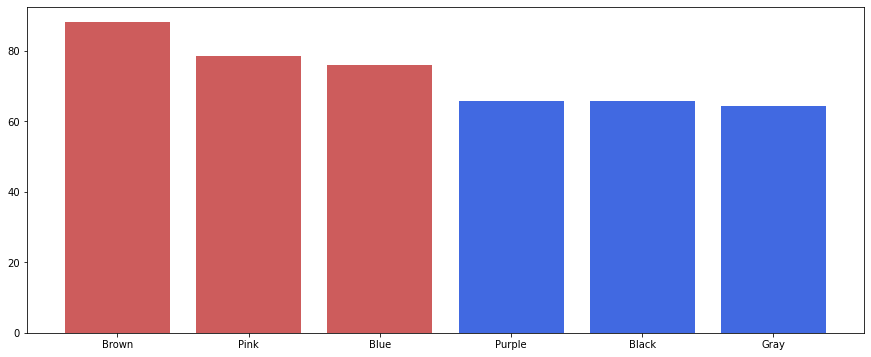

./data/2022.gz.parquet
28000/1289612


KeyboardInterrupt: 

In [9]:

plt.rcParams["figure.figsize"] = (15,6)

source = Stream()

sources = ['./data/{0}.gz.parquet'.format(x) for x in range(2015,2023)]


sdf = DataFrame(stream = source, example= dfheadinfo.head(1))


d = {'Gray' : [0,1], 'White' : [0,1], 'Unknown' : [0,1], 'Green' : [0,1], 'Red' : [0,1], 
     'Blue' : [0,1], 'Black' : [0,1], 'Pink' : [0,1], 'Silver' : [0,1], 'Gold' : [0,1], 
     'Brown' : [0,1], 'Yellow' : [0,1], 'Purple' : [0,1], 'Orange' : [0,1]}

def stest(r):
    d[str(r['Vehicle Color'])][0] += (r['Violation Price'] - d[str(r['Vehicle Color'])][0])/d[str(r['Vehicle Color'])][1]
    d[str(r['Vehicle Color'])][1] += 1

    

sdf.stream.sink(stest)

for j in sources:
    df = pd.read_parquet(j)
    for i in range(len(df)):
        source.emit(df.iloc[i])
        if i%1000==0:
            clear_output(wait=True)
            plt.clf()
            tmp = d.copy()
            tmp.pop('Unknown', None)
            #tmp = toolz.valmap(calc,tmp)
            data1 = dict(sorted(tmp.items(), key=lambda item: item[1], reverse=True)[:3])
            data2 = dict(sorted(tmp.items(), key=lambda item: item[1])[:3])
            values = list(data1.values()) + list(reversed(list(data2.values())))
            avg = [x[0] for x in values]
            counts = [x[1] for x in values]
            labels = list(data1.keys()) + list(reversed(list(data2.keys())))
            #legend = {'highest':'indianred', 'lowest':'royalblue'}
            #l = list(legend.keys())
            #h = [plt.Rectangle((0,0),1,1, color=legend[label]) for label in l]
            #plt.legend(h, l)
            plt.bar(np.arange(len(avg)), avg, tick_label=labels, 
                    color=['indianred']*3+['royalblue']*3)
            #plt.bar(np.arange(len(counts))+0.15, counts, tick_label=labels, 
            #        color=['indianred']*3+['royalblue']*3,
            #        width = 0.3)
            plt.show()
            print("{2}\n{0}/{1}".format(i, len(df), j))


## Number of tickets for each street

In [11]:

plt.rcParams["figure.figsize"] = (15,6)

source = Stream()

sources = ['./data/{0}.gz.parquet'.format(x) for x in range(2015,2023)]


sdf = DataFrame(stream = source, example= dfheadinfo.head(1))

d = dict()

def stest(r):
    street = str(r['Street name'])
    if street in d:
        d[street] = d[street] + 1
    else:
        d[street] = 1

    

sdf.stream.sink(stest)

for j in sources:
    df = pd.read_parquet(j)
    for i in range(len(df)):
        source.emit(df.iloc[i])
        if i%1000==0:
            clear_output(wait=True)
            plt.clf()
            data = dict(sorted(d.items(), key=lambda item: item[1], reverse=True)[:6])
            plt.bar(range(len(data)), list(data.values()), tick_label=list(data.keys()), width=0.5)
            plt.show()
            print("{2}\n{0}/{1}".format(i, len(df), j))
        

KeyboardInterrupt: 

## Average ticket price for streets

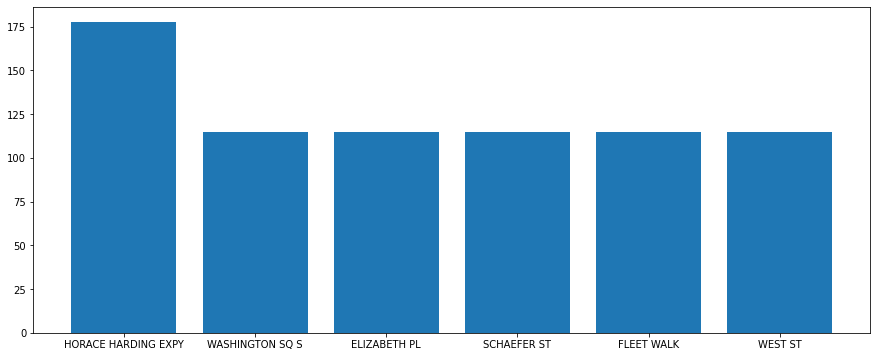

./data/2022.gz.parquet
119000/1289612


KeyboardInterrupt: 

In [12]:

plt.rcParams["figure.figsize"] = (15,6)

source = Stream()

sources = ['./data/{0}.gz.parquet'.format(x) for x in range(2015,2023)]


sdf = DataFrame(stream = source, example= dfheadinfo.head(1))

avg = {}

count = {}


def stest(r):
    s_n = str(r['Street name'])
    if s_n in avg:
        avg[s_n] = avg[s_n] + (r['Violation Price'] - avg[s_n])/count[s_n]
    else:
        avg[s_n] = r['Violation Price']
        count[s_n] = 2
    

sdf.stream.sink(stest)

for j in sources:
    df = pd.read_parquet(j)
    for i in range(len(df)):
        source.emit(df.iloc[i])
        if i%1000==0:
            clear_output(wait=True)
            plt.clf()
            data = dict(sorted(avg.items(), key=lambda item: item[1], reverse=True)[:6])
            plt.bar(range(len(data)), list(data.values()), tick_label=list(data.keys()))
            plt.show()
            print("{2}\n{0}/{1}".format(i, len(df), j))
        

## Clustering for lat and lang

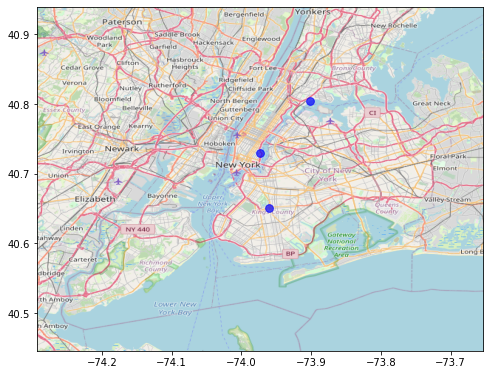

In [7]:
# Source: https://stackoverflow.com/questions/3698532/online-k-means-clustering
# Or https://www.cs.princeton.edu/courses/archive/fall08/cos436/Duda/C/sk_means.htm

source = Stream()

sources = ['./data/{0}.gz.parquet'.format(x) for x in range(2015,2023)]


sdf = DataFrame(stream = source, example= dfheadinfo.head(1))

n = 3

random.seed(datetime.now())

loong = [x/100 for x in random.sample(range(-7394, -7388), n)]
laat = [x/100 for x in random.sample(range(4071, 4077), n)]

ruh_m = plt.imread('data/nyc_map.png')
BBox = (-74.2937, -73.6537,
        40.4459, 40.9395)

clusters = [list(a) for a in zip(loong, laat)] # [[lng, lat], ...]
counts = [0]*n

def stest(r):
    lng = r['lng']
    lat = r['lat']
    closest = np.argmin(distance.cdist([[lng, lat]], clusters))
    
    counts[closest] = counts[closest] + 1
    
    clusters[closest][0] = clusters[closest][0] + (1/counts[closest])*(lng-clusters[closest][0])
    clusters[closest][1] = clusters[closest][1] + (1/counts[closest])*(lat-clusters[closest][1])


    
 

sdf.stream.sink(stest)

for j in sources:
    df = pd.read_parquet(j)
    for i in range(len(df)):
        source.emit(df.iloc[i])
        if i%100==0:
            fig, ax = plt.subplots(figsize = (8,7))
            lg, la = list(zip(*clusters))
            ax.scatter(lg, la, zorder = 1, alpha= 0.7, c=['b'], s=60)
            ax.set_xlim(BBox[0],BBox[1])
            ax.set_ylim(BBox[2],BBox[3])
            ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')
            clear_output(wait=True)
            plt.show()
            #print("{0}\n{1}/{2}".format(j, i, len(df)))
            #print(clusters)
            #print(counts)
        

## Clustering for lat, long and price

In [8]:
c = ["limegreen","orange","red"]
v = [0,.5,1.]
l = list(zip(v,c))
cmap=LinearSegmentedColormap.from_list('rgb',l, N=256)

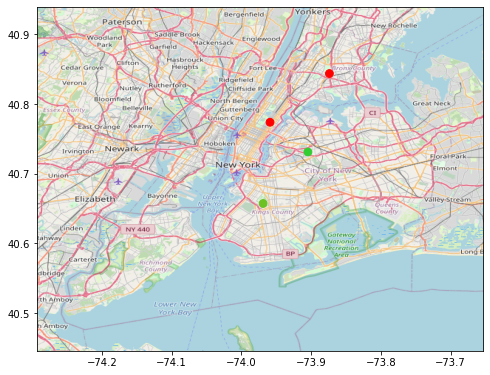

KeyboardInterrupt: 

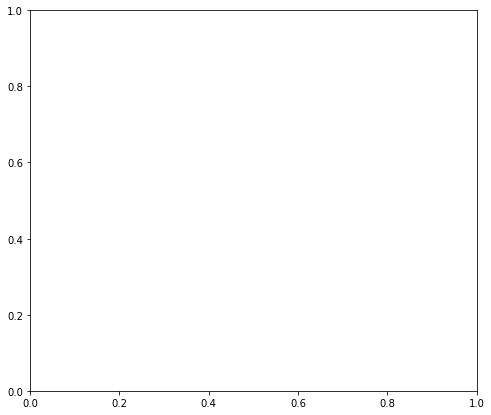

In [9]:
# Source: https://stackoverflow.com/questions/3698532/online-k-means-clustering
# Or https://www.cs.princeton.edu/courses/archive/fall08/cos436/Duda/C/sk_means.htm

source = Stream()

sources = ['./data/{0}.gz.parquet'.format(x) for x in range(2015,2023)]


sdf = DataFrame(stream = source, example= dfheadinfo.head(1))

n = 4

ruh_m = plt.imread('data/nyc_map.png')
BBox = (-74.2937, -73.6537,
        40.4459, 40.9395)

random.seed(datetime.now())

loong = [x/100 for x in random.sample(range(-7410, -7380), n)]
laat = [x/100 for x in random.sample(range(4060, 4085), n)]

clusters = [list(a) for a in zip(loong, laat)] # [[lng, lat], ...]
prices = random.sample(range(10,500), n)
counts = [0]*n



def stest(r):
    # Get values
    lng = r['lng']
    lat = r['lat']
    price = r['Violation Price']
    
    # Get list of dist
    geo_dist = distance.cdist([[lng, lat]], clusters)
    price_dist = list(map(lambda x: (x-price), prices))
    
    # Normalize by max dist
    max_dist = np.max(geo_dist)
    max_price = np.max(price_dist)
    geo_dist = [x/max_dist for x in geo_dist]
    price_dist = [x/max_price for x in price_dist]
    
    # Sum the two lists
    total_dist = [sum(x) for x in zip(geo_dist, price_dist)]
    
    # Find closest
    closest = np.argmin(total_dist)
    
    # Update values
    counts[closest] = counts[closest] + 1
    clusters[closest][0] = clusters[closest][0] + (1/counts[closest])*(lng-clusters[closest][0])
    clusters[closest][1] = clusters[closest][1] + (1/counts[closest])*(lat-clusters[closest][1])
    prices[closest] = prices[closest] + (1/counts[closest])*(price-prices[closest])

    

sdf.stream.sink(stest)

for j in sources:
    df = pd.read_parquet(j)
    for i in range(len(df)):
        source.emit(df.iloc[i])
        if i%100==0:
            fig, ax = plt.subplots(figsize = (8,7))
            lg, la = list(zip(*clusters))
            ax.scatter(lg, la, zorder = 1, alpha= 1.0, c=prices, cmap=cmap, s=60)
            ax.set_xlim(BBox[0],BBox[1])
            ax.set_ylim(BBox[2],BBox[3])
            ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')
            clear_output(wait=True)
            plt.show()
            #print(clusters)
            #print(prices)
        

In [1]:
list(range(2016,2023))

[2016, 2017, 2018, 2019, 2020, 2021, 2022]

## Clustering for temp and price

In [21]:
# Source: https://stackoverflow.com/questions/3698532/online-k-means-clustering
# Or https://www.cs.princeton.edu/courses/archive/fall08/cos436/Duda/C/sk_means.htm

source = Stream()

sources = ['./data/{0}.gz.parquet'.format(x) for x in range(2015,2023)]


sdf = DataFrame(stream = source, example= dfheadinfo.head(1))

n = 3

random.seed(datetime.now())

#-12.8
#31.9

temp = random.sample(range(-10,30), n)
prices = random.sample(range(10,500), n)
counts = [0]*n



def stest(r):
    # Get values
    ttemp = r['temp']
    price = r['Violation Price']
    
    # Get list of dist
    temp_dist = list(map(lambda x: (x-ttemp), temp))
    price_dist = list(map(lambda x: (x-price), prices))

    
    # Normalize by max dist
    max_temp = np.max(temp_dist)
    max_price = np.max(price_dist)
    temp_dist = [x/max_temp for x in temp_dist]
    price_dist = [x/max_price for x in price_dist]

    
    # Sum the two lists
    total_dist = [sum(x) for x in zip(temp_dist, price_dist)]
    
    # Find closest
    closest = np.argmin(total_dist)
    
    # Update values
    counts[closest] = counts[closest] + 1
    temp[closest] = temp[closest] + (1/counts[closest])*(ttemp-temp[closest])
    prices[closest] = prices[closest] + (1/counts[closest])*(price-prices[closest])


    
 

sdf.stream.sink(stest)

for j in sources:
    df = pd.read_parquet(j)
    for i in range(len(df)):
        source.emit(df.iloc[i])
        if i%100==0:
            tt = np.around(temp, 1)
            pp = np.around(prices, 1)
            print("{0}\n{1}/{2} ({3})".format(list(zip(tt, pp, counts)), i, len(df), j))
            clear_output(wait=True)            
            #print("{0}\n{1}/{2}".format(j, i, len(df)))
            #print(clusters)
            #print(counts)
        

[(31.3, 69.1, 9558), (13.2, 68.5, 7128686), (14.6, 311.6, 9503)]
1000900/2226390 (./data/2018.gz.parquet)


KeyboardInterrupt: 

## Average price

In [18]:

source = Stream()

sources = ['./data/{0}.gz.parquet'.format(x) for x in range(2022,2023)]


sdf = DataFrame(stream = source, example= dfheadinfo.head(1))

price_count = [0,1]

def stest(r):
    price_count[0] = price_count[0] + (r['Violation Price']-price_count[0])/price_count[1]
    price_count[1] = price_count[1] + 1
    

    

sdf.stream.sink(stest)

for j in sources:
    df = pd.read_parquet(j)
    for i in range(len(df)):
        source.emit(df.iloc[i])
        if i%1000==0:
            clear_output(wait=True)
            print("{0}\n{1}/{2}".format(j, i, len(df)))
            print(price_count[0])
        

./data/2022.gz.parquet
4000/1289612
83.78155461134722


KeyboardInterrupt: 